In [1]:

import os
import json
import requests
import sys
sys.path.insert(0, '/Users/pinglab/Documents/yuyan/bioagent/scauto')
from src.groupchat import init_groupchat
from src.agents.init_agents import bioagent
import autogen

from dotenv import load_dotenv


## setup

In [2]:
# load keys
load_dotenv()

OAI_CONFIG = "configs/OAI_config.json"
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
LLM_MODEL = 'gpt-4o-mini' #'gpt-3.5-turbo'#  #
CODE_EXTENSIONS = "DockerCLI"# 'LocalCLI' # "JupyterCLI"
HUMAN_INPUT_MODE = "NEVER" # ['ALWAYS', 'NEVER', 'TERMINATE','CODE_ONLY', 'PLAN_ONLY', 'REVIEW_ONLY']




## init agents

In [4]:

#create agents
agents = bioagent(OAI_CONFIG, OPENAI_API_KEY, LLM_MODEL, HUMAN_INPUT_MODE)
planner = agents.create_planner()
bioinformatician = agents.create_bioinformatician()
code_executor = agents.create_code_executor(code_executer = CODE_EXTENSIONS)
summarizer = agents.create_summarizer()
reviewer = agents.create_reviewer()

# agent_list = [planner, data_scientist, software_engineer, biologist]
# use dict to query by key instead of index
agent_dict = {
    "planner": planner,
    "bioinformatician": bioinformatician,
    "code_executor": code_executor,
    "summarizer": summarizer,
    "reviewer": reviewer
}

#create groupchat
groupchat, groupchat_manager = init_groupchat(agent_dict = agent_dict, OAI_config = OAI_CONFIG, openai_key_file = OPENAI_API_KEY, LLM_model = LLM_MODEL)



## questions

In [5]:
question = "Please calculate the pseudotime and visualize it in a figure."

PROMPT = f"""
    Pathogenic variants in genes that cause dilated (DCM) and arrhythmogenic cardiomyopathies (ACM) convey high risks for the development of 
    heart failure through unknown mechanisms. Using single nucleus RNA sequencing (snRNAseq), we characterized the transcriptome of 880000 nuclei from 18 
    control and 61 failing, non-ischemic human hearts with pathogenic variants in DCM and ACM genes or idiopathic disease. We performed genotype-stratified analyses 
    of the ventricular cell lineages and transcriptional states. The resultant DCM and ACM ventricular cell atlas demonstrated distinct right and left ventricular 
    responses, highlighting genotype-associated pathways, intercellular interactions, and differential gene expression at single cell resolution. Together 
    these data illuminate both shared and distinct cellular and molecular architectures of human heart failure and suggest candidate therapeutic targets.
    
    The dataset in question is "Data/origin.h5ad", which is in h5ad format. Using python as the primary coding language. 

    Questions:
    {question}
"""



In [6]:

groupchat_manager.initiate_chat(planner, message = PROMPT, verbose=True)



chat_manager (to planner):


    Pathogenic variants in genes that cause dilated (DCM) and arrhythmogenic cardiomyopathies (ACM) convey high risks for the development of 
    heart failure through unknown mechanisms. Using single nucleus RNA sequencing (snRNAseq), we characterized the transcriptome of 880000 nuclei from 18 
    control and 61 failing, non-ischemic human hearts with pathogenic variants in DCM and ACM genes or idiopathic disease. We performed genotype-stratified analyses 
    of the ventricular cell lineages and transcriptional states. The resultant DCM and ACM ventricular cell atlas demonstrated distinct right and left ventricular 
    responses, highlighting genotype-associated pathways, intercellular interactions, and differential gene expression at single cell resolution. Together 
    these data illuminate both shared and distinct cellular and molecular architectures of human heart failure and suggest candidate therapeutic targets.
    
    The dataset in question i

ChatResult(chat_id=None, chat_history=[{'content': '\n    Pathogenic variants in genes that cause dilated (DCM) and arrhythmogenic cardiomyopathies (ACM) convey high risks for the development of \n    heart failure through unknown mechanisms. Using single nucleus RNA sequencing (snRNAseq), we characterized the transcriptome of 880000 nuclei from 18 \n    control and 61 failing, non-ischemic human hearts with pathogenic variants in DCM and ACM genes or idiopathic disease. We performed genotype-stratified analyses \n    of the ventricular cell lineages and transcriptional states. The resultant DCM and ACM ventricular cell atlas demonstrated distinct right and left ventricular \n    responses, highlighting genotype-associated pathways, intercellular interactions, and differential gene expression at single cell resolution. Together \n    these data illuminate both shared and distinct cellular and molecular architectures of human heart failure and suggest candidate therapeutic targets.\n   

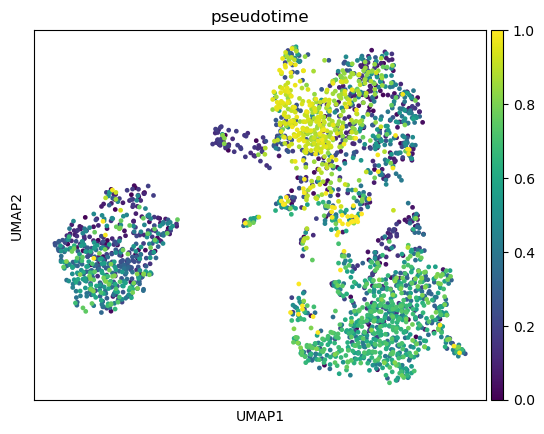

In [7]:
# visualize png
from IPython.display import Image
Image("./GENERATED_CODE_BASE/figures/umappseudotime_visualization.png")